In [2]:
import numpy as np
from numba import jit 

@jit
def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

@jit
def total_energy(positions):
    """
    Calculate the total energy
    input:
    positions: 3*N 1-D array which represents the atomic positions
    output
    E: the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)

    #positions = [x0, y0, z0, x1, y1, z1, .....  , xn, yn, zn]
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            #print('pos1:  ', pos1)
            #print('pos2:  ', pos2)
            dist = np.linalg.norm(pos1-pos2)
            #print(i,j, dist)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))
            

In [8]:
from scipy.optimize import minimize

f_values = []
x_values = []
N_attempts = 500
N_atom = 13
for i in range(N_attempts):
    pos = init_pos(N_atom)
    res = minimize(total_energy, pos, method='CG', tol=1e-4)
    f_values.append(res.fun)
    x_values.append(res.x)
    print('\r StepL {:d} out of {:d}; values: {:.4f}'.format(i, N_attempts, res.fun), flush=True, end='')
    #if i%10==0:
        #print('step: ', i, '  values:', res.fun)

print('\n The global minimum:  ', min(f_values))

 StepL 499 out of 500; values: -25.3443
 The global minimum:   -44.32680141952354


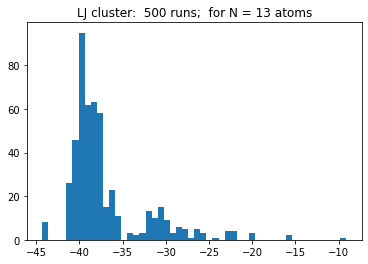

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('LJ cluster:  '+ str(N_attempts)+ ' runs;  for N = ' + str(N_atom)+' atoms')
plt.hist(f_values,50)
plt.show()